[pandas.DataFrame.plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html?highlight=plot#pandas.DataFrame.plot)

[pandas.Series.plot](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.html?highlight=plot#pandas.Series.plot)

导入依赖包

### 单组折线图

<AxesSubplot:>

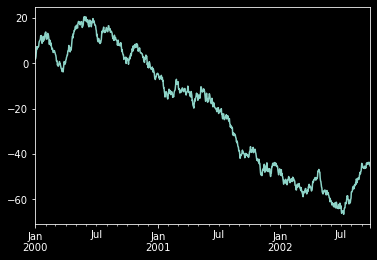

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from pandas import DataFrame,Series
plt.style.use('dark_background')     

np.random.seed(0)             #使得每次生成的随机数相同
ts = pd.Series(np.random.randn(1000),index = pd.date_range("1/1/2000",periods = 1000))
ts1 = ts.cumsum()             #累加
ts1.plot(kind = 'line')       #默认绘制折线图

### 多组折线图

<AxesSubplot:>

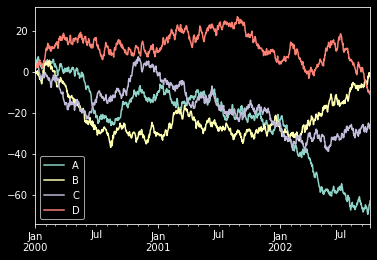

In [2]:
np.random.seed(0)
df = pd.DataFrame(np.random.randn(1000,4) , index = ts.index , columns = list('ABCD'))
df = df.cumsum()
df.plot()

### 单组条形图

<AxesSubplot:>

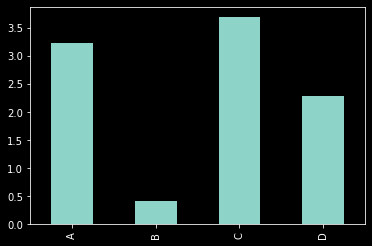

In [3]:
df.iloc[5].plot(kind = 'bar')

### 多组条形图

<AxesSubplot:>

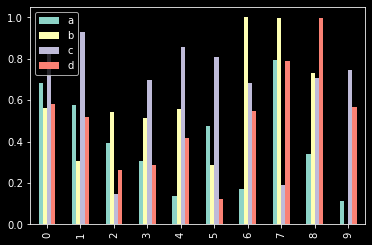

In [4]:
df2 = pd.DataFrame(np.random.rand(10,4) , columns = ['a','b','c','d'])
df2.plot.bar()

### 堆积条形图

<AxesSubplot:>

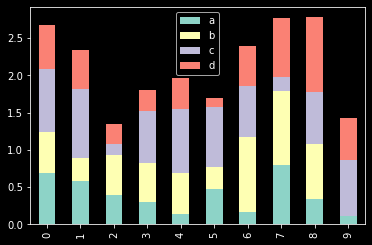

In [5]:
df2.plot.bar(stacked = True)

### 水平堆积条形图

<AxesSubplot:>

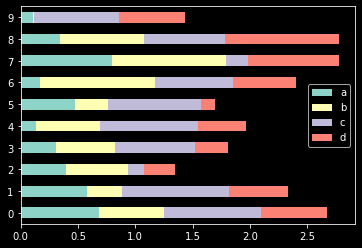

In [6]:
df2.plot.barh(stacked = True)

### 直方图

<AxesSubplot:ylabel='Frequency'>

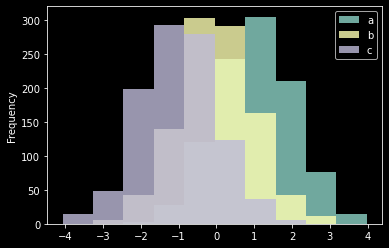

In [7]:
df4 = pd.DataFrame(
    {
        "a": np.random.randn(1000) + 1,
        "b": np.random.randn(1000),
        "c": np.random.randn(1000) - 1,
    },
    columns=["a", "b", "c"],
)
df4.plot.hist(alpha=0.8)

### 分面直方图

array([[<AxesSubplot:title={'center':'A'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'C'}>,
        <AxesSubplot:title={'center':'D'}>]], dtype=object)

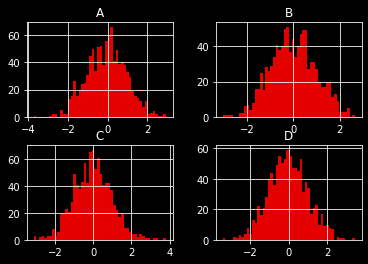

In [8]:
df.diff().hist(color="r", alpha=0.9, bins=50)

### 箱图

<AxesSubplot:>

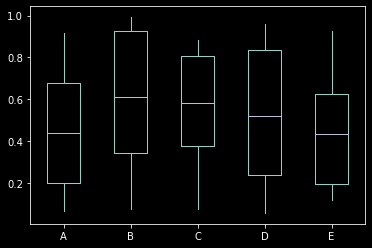

In [9]:
df = pd.DataFrame(np.random.rand(10, 5), columns=["A", "B", "C", "D", "E"])
df.plot.box()

### 面积图

<AxesSubplot:>

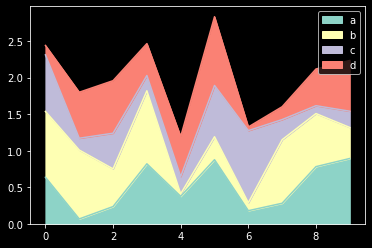

In [10]:
df = pd.DataFrame(np.random.rand(10, 4), columns=["a", "b", "c", "d"])
df.plot.area()

### 堆积面积图

<AxesSubplot:>

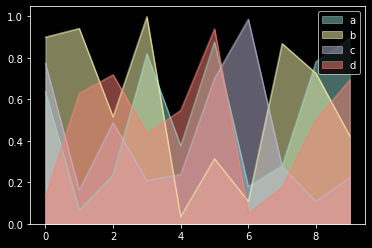

In [11]:
df.plot.area(stacked=False)

### 散点图

<AxesSubplot:xlabel='c', ylabel='d'>

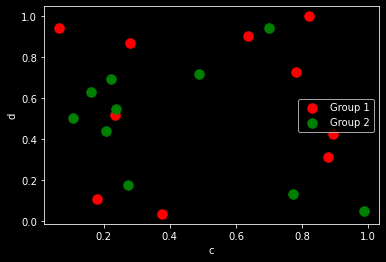

In [12]:
ax = df.plot.scatter(x="a", y="b", color="r", label="Group 1",s = 90)
df.plot.scatter(x="c", y="d", color="g", label="Group 2", ax =ax,s = 90)

### 单组饼图

<AxesSubplot:ylabel='series'>

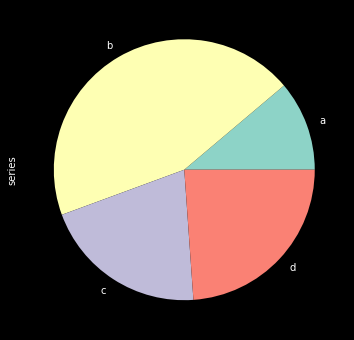

In [13]:
series = pd.Series(3 * np.random.rand(4), index=["a", "b", "c", "d"], name="series")
series.plot.pie(figsize=(6, 6))

### 多组饼图

array([<AxesSubplot:ylabel='x'>, <AxesSubplot:ylabel='y'>], dtype=object)

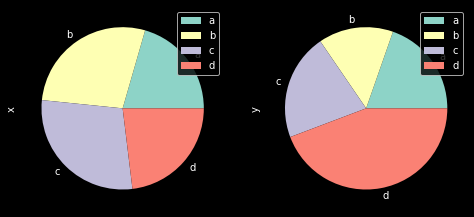

In [14]:
df = pd.DataFrame(
    3 * np.random.rand(4, 2), index=["a", "b", "c", "d"], columns=["x", "y"]
)
df.plot.pie(subplots=True, figsize=(8, 4))

### 多组饼图

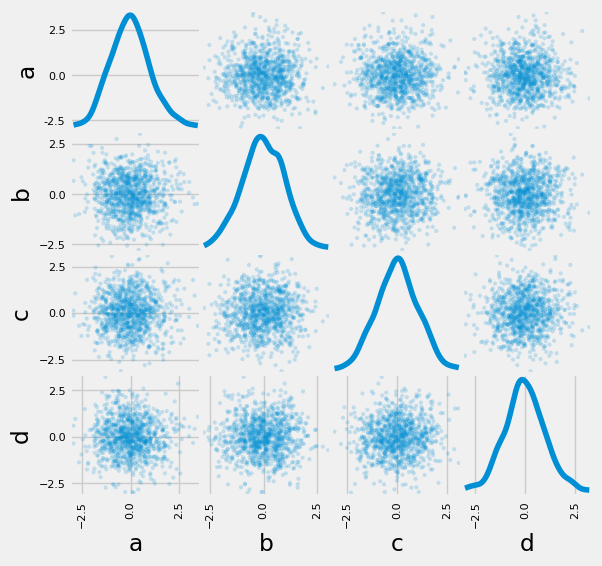

In [15]:
import matplotlib as mpl
mpl.rc_file_defaults()
plt.style.use('fivethirtyeight')
from pandas.plotting import scatter_matrix
df = pd.DataFrame(np.random.randn(1000, 4), columns=["a", "b", "c", "d"])
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal="kde")
plt.show()

### hexbin 图

<AxesSubplot:xlabel='a', ylabel='b'>

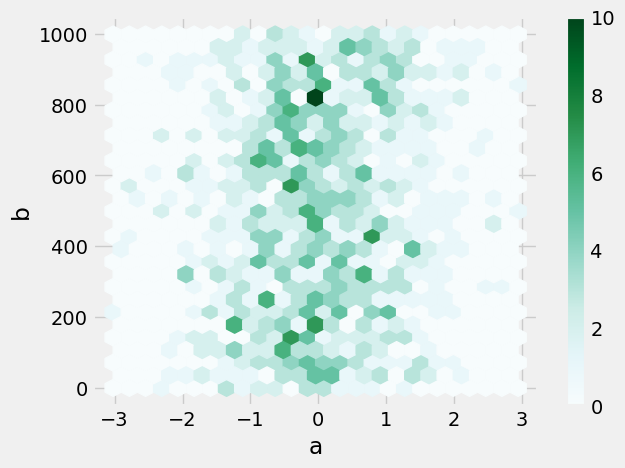

In [16]:
df = pd.DataFrame(np.random.randn(1000,2),columns = ["a","b"])
df["b"] = df["b"] + np.arange(1000)
df.plot.hexbin(x = 'a' , y = 'b' ,gridsize = 25)

### 核密度图

<AxesSubplot:ylabel='Density'>

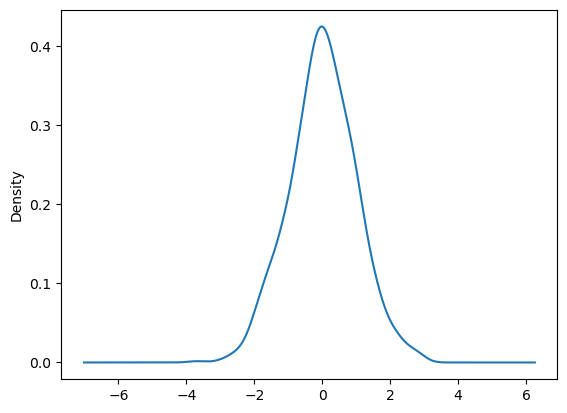

In [31]:
ser = pd.Series(np.random.randn(1000))
ser.plot.kde()

### autocorrelation_plot图

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

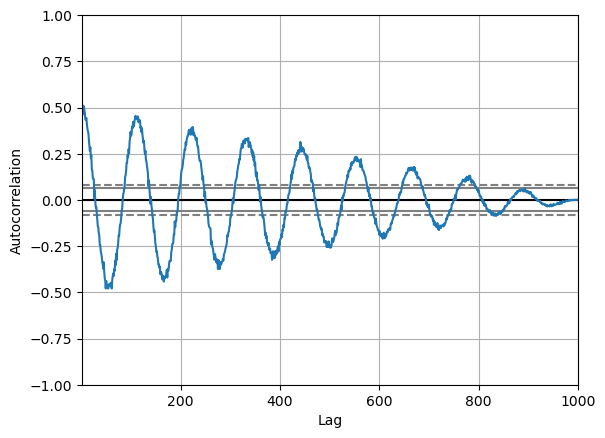

In [34]:
from pandas.plotting import autocorrelation_plot
plt.figure();
spacing = np.linspace(-9 * np.pi, 9 * np.pi, num=1000)
data = pd.Series(0.7 * np.random.rand(1000) + 0.3 * np.sin(spacing))
autocorrelation_plot(data)

### bootstrap_plot图

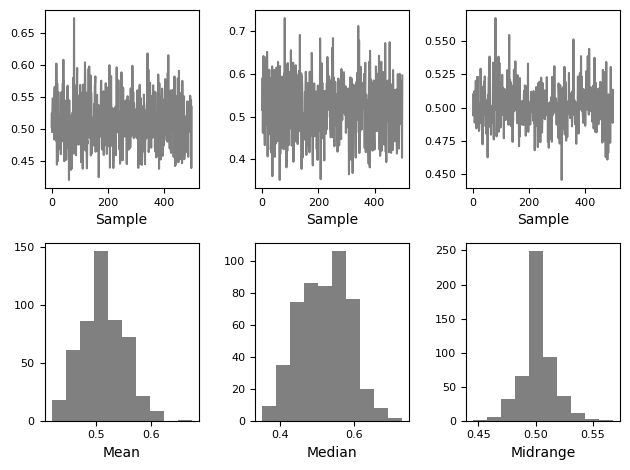

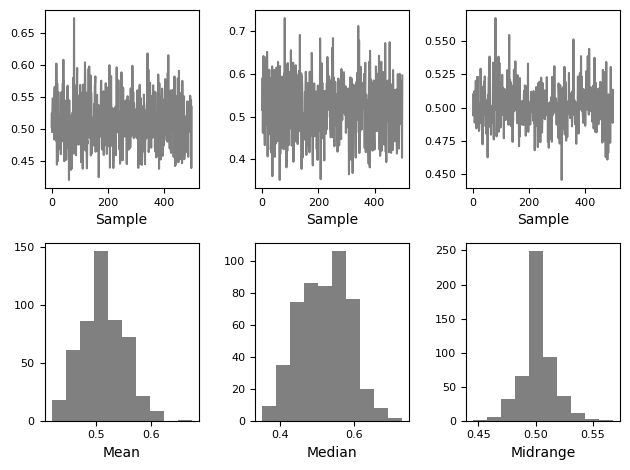

In [38]:
from pandas.plotting import bootstrap_plot
data = pd.Series(np.random.rand(1000))
bootstrap_plot(data, size=50, samples=500, color="grey")

### 子图（subplot）

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

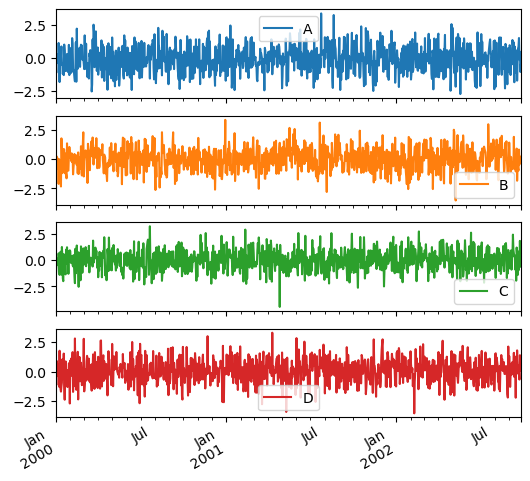

In [39]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list("ABCD"))
df.plot(subplots=True, figsize=(6, 6))

### 子图任意排列

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

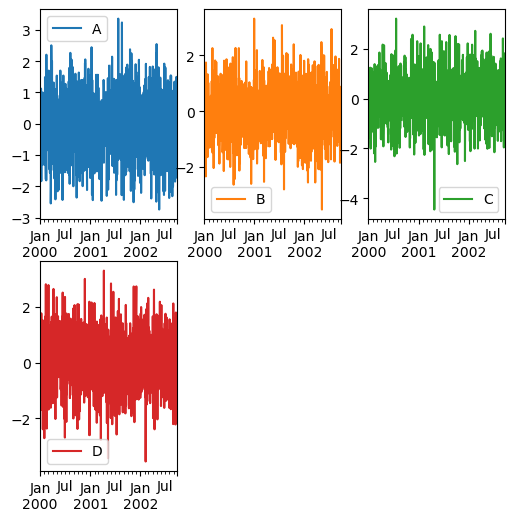

In [40]:
df.plot(subplots=True, layout=(2, 3), figsize=(6, 6), sharex=False)

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

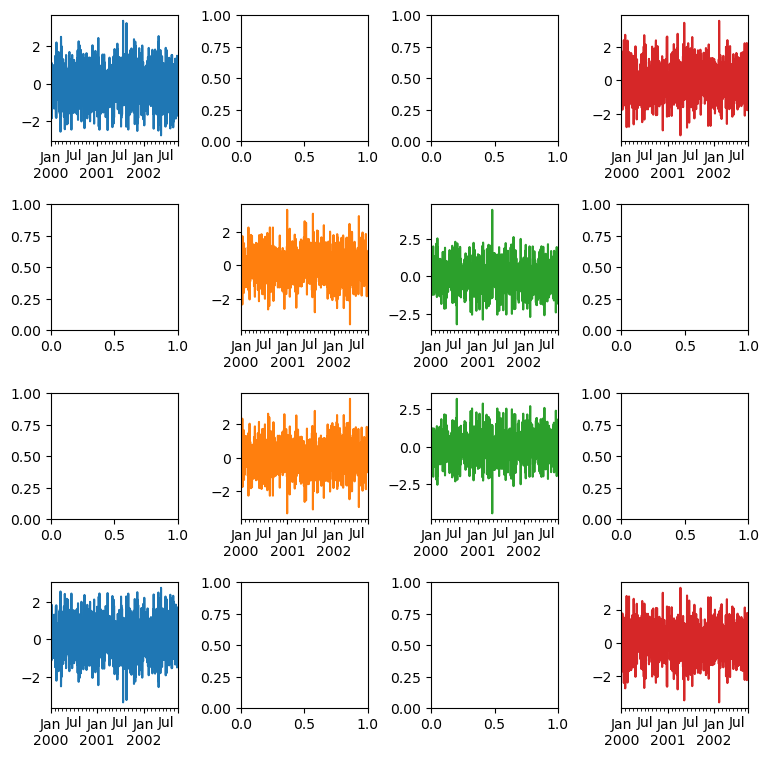

In [41]:
fig, axes = plt.subplots(4, 4, figsize=(9, 9))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
target1 = [axes[0][0], axes[1][1], axes[2][2], axes[3][3]]
target2 = [axes[3][0], axes[2][1], axes[1][2], axes[0][3]]
df.plot(subplots=True, ax=target1, legend=False, sharex=False, sharey=False);
(-df).plot(subplots=True, ax=target2, legend=False, sharex=False, sharey=False)

### 图中绘制数据表格

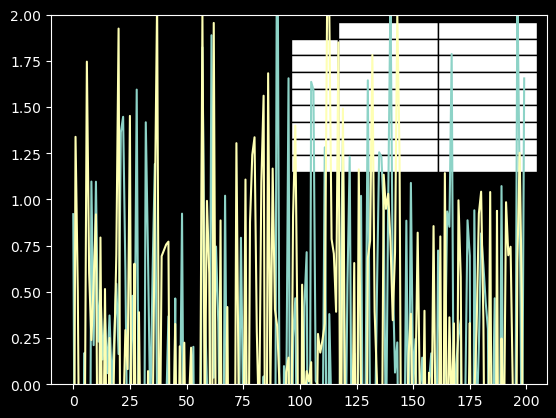

In [54]:
from pandas.plotting import table
df = pd.DataFrame(np.random.randn(200,2))
mpl.rc_file_defaults()
plt.style.use('dark_background')
fig, ax = plt.subplots(1, 1)
table(ax, np.round(df.describe(), 3), loc="upper right", colWidths=[0.2, 0.2, 0.2]);
df.plot(ax=ax, ylim=(0, 2), legend = None);